# Vizailization will be created here

> Viz notebook

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp viz_utils

In [ ]:
#| export
import cv2
from pathlib import Path
import numpy as np
from fastcore.all import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage import binary_dilation, binary_erosion
import matplotlib.patches as patches

In [ ]:
mpl.rcParams['image.cmap'] = 'gray'

In [ ]:
#| export
get_name = np.vectorize(lambda x: Path(x).name)

In [ ]:
Path.home()

Path('/home/hasan')

In [ ]:
#im_path = Path(r'/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_images/')
#mask_path = Path(r'/home/hasan/Schreibtisch/projects/data/microscopy/patch_train_masks/')
im_path = Path(r'/home/hasan/workspace/data/microscopy_data/patch_images/')
mask_path = Path(r'/home/hasan/workspace/data/microscopy_data/patch_masks')

images=im_path.ls()
masks=mask_path.ls()    

In [ ]:
r_idx = np.random.choice(len(im_path.ls()), 1)[0]

In [ ]:
s_img = images[r_idx]
s_msk = masks[r_idx]

In [ ]:
s_img.name, s_msk.name

('img_24_p_3.png', 'img_24_p_3.png')

In [ ]:
#| export
def overlay_mask(
        im_path, 
        msk_path, 
        overlay_clr=(0, 1, 0),
        scale=1,
        alpha=0.5,
        ):
    'Creaete a overlay image from image and mask'
    # Read the grayscale image
    gray_img = cv2.imread(f'{im_path}', cv2.IMREAD_GRAYSCALE)
    if gray_img is None:
        raise ValueError("Could not read the grayscale image")

    # Read the mask image
    mask_img = cv2.imread(f'{msk_path}', cv2.IMREAD_GRAYSCALE)
    mask_img = mask_img.astype(bool)
    if mask_img is None:
        raise ValueError("Could not read the mask image")

    # Check if dimensions of both images are the same
    if gray_img.shape != mask_img.shape:
        raise ValueError("Dimensions of grayscale image and mask do not match")

    # Convert image to 3 channels
    rgb_img = np.stack([gray_img]*3, axis=-1)/255
    fig, ax = plt.subplots()
    ax.imshow(rgb_img)

    clrd_overlay = np.zeros_like(rgb_img)
    clrd_overlay[mask_img]=overlay_clr
    ax.imshow(clrd_overlay, alpha=alpha)





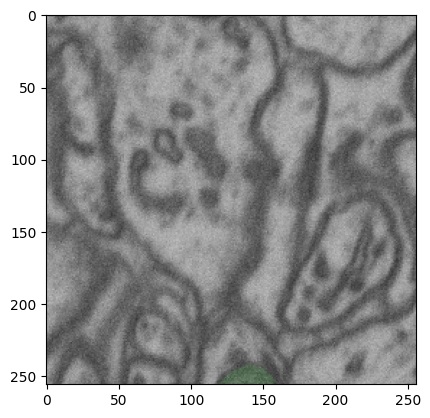

In [ ]:
overlay_mask(s_img, s_msk,alpha=0.1)

In [ ]:
#| export
def overlay_mask_border_on_image(im_path, msk_path, border_color=(0, 1, 0), border_width=1):
    """
    Overlays the border of a binary mask on a grayscale image and displays the result using matplotlib.
    
    Args:
    image (numpy.ndarray): Grayscale image.
    mask (numpy.ndarray): Binary mask of the same size as the image.
    border_color (tuple): RGB color for the mask border in the range [0, 1].
    border_width (int): Width of the border.
    
    Returns:
    None: The function displays a plot.
    """
    gray_img = cv2.imread(f'{im_path}', cv2.IMREAD_GRAYSCALE)
    if gray_img is None:
        raise ValueError("Could not read the grayscale image")

    # Read the mask image
    mask_img = cv2.imread(f'{msk_path}', cv2.IMREAD_GRAYSCALE)
    mask_img = mask_img.astype(bool)
    if mask_img is None:
        raise ValueError("Could not read the mask image")

    # Check if dimensions of both images are the same
    if gray_img.shape != mask_img.shape:
        raise ValueError("Dimensions of grayscale image and mask do not match")
    # Ensure the mask is boolean

    # Find the borders of the mask
    dilated_mask = binary_dilation(mask_img, iterations=border_width)
    eroded_mask = binary_erosion(mask_img, iterations=border_width)
    border = dilated_mask & ~eroded_mask

    # Convert grayscale image to RGB
    rgb_image = np.stack([gray_img]*3, axis=-1) / 255.0  # Normalize for matplotlib

    # Apply the colored border
    rgb_image[border] = border_color

    # Display the image using matplotlib
    plt.imshow(rgb_image, cmap='gray')
    plt.axis('off')  # Turn off axis numbers
    plt.show()



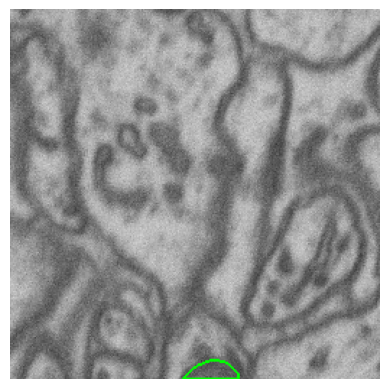

In [ ]:

overlay_mask_border_on_image(s_img, s_msk)

In [ ]:
def overlay_yolo_mask(
        im_path, 
        msk_path, 
        colors=None
        alpha=0.5,
        ):
    'Creaete a overlay image from image and mask'
    # Read the grayscale image
    gray_img = cv2.imread(f'{im_path}', cv2.IMREAD_GRAYSCALE)
    if gray_img is None:
        raise ValueError("Could not read the grayscale image")

    # Read the mask image
    mask_img = cv2.imread(f'{msk_path}', cv2.IMREAD_GRAYSCALE)
    mask_img = mask_img.astype(bool)
    if mask_img is None:
        raise ValueError("Could not read the mask image")

    # Check if dimensions of both images are the same
    if gray_img.shape != mask_img.shape:
        raise ValueError("Dimensions of grayscale image and mask do not match")

    # Convert image to 3 channels
    rgb_img = np.stack([gray_img]*3, axis=-1)

    image_h, image_w, _ = rgb_img.shape
    fig, ax = plt.subplots()
    ax.imshow(rgb_img)


    with open(msk_path, 'r') as f:
        for line in f:
            parts = line.srtrip().split()
            category_id = int(parts[0])


    clrd_overlay = np.zeros_like(rgb_img)
    clrd_overlay[mask_img]=overlay_clr
    ax.imshow(clrd_overlay, alpha=alpha
)

In [ ]:
yolo_mask_path = Path(r'/home/hasan/workspace/data/microscopy_data/yolo_dataset_train')
im_path = Path(r'/home/hasan/workspace/data/microscopy_data/patch_images/')
yolo_mask_path.ls(), im_path.ls()

((#1642) [Path('/home/hasan/workspace/data/microscopy_data/yolo_dataset_train/img_156_p_9.txt'),Path('/home/hasan/workspace/data/microscopy_data/yolo_dataset_train/img_163_p_3.txt'),Path('/home/hasan/workspace/data/microscopy_data/yolo_dataset_train/img_156_p_3.txt'),Path('/home/hasan/workspace/data/microscopy_data/yolo_dataset_train/img_109_p_6.txt'),Path('/home/hasan/workspace/data/microscopy_data/yolo_dataset_train/img_115_p_9.txt'),Path('/home/hasan/workspace/data/microscopy_data/yolo_dataset_train/img_146_p_4.txt'),Path('/home/hasan/workspace/data/microscopy_data/yolo_dataset_train/img_107_p_1.txt'),Path('/home/hasan/workspace/data/microscopy_data/yolo_dataset_train/img_3_p_5.txt'),Path('/home/hasan/workspace/data/microscopy_data/yolo_dataset_train/img_146_p_5.txt'),Path('/home/hasan/workspace/data/microscopy_data/yolo_dataset_train/img_80_p_7.txt')...],
 (#1642) [Path('/home/hasan/workspace/data/microscopy_data/patch_images/img_147_p_7.png'),Path('/home/hasan/workspace/data/micro

/tmp/ipykernel_136334/2497420586.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10')


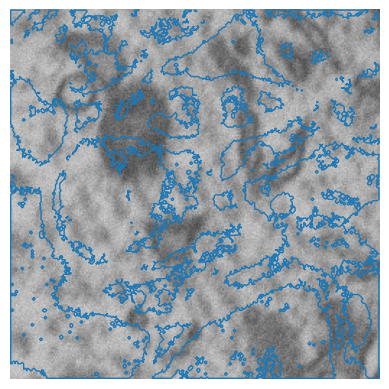

In [ ]:

r_idx = np.random.choice(len(im_path.ls()), 1)[0]
sn_img = im_path.ls()[r_idx]
image = cv2.imread(f'{sn_img}')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rgb_img = image

image_height, image_width, _ = rgb_img.shape
fig, ax = plt.subplots(1)
ax.imshow(rgb_img)
colors=None
if colors is None:
        colors = plt.cm.get_cmap('tab10')
ax.axis('off')
with open(yolo_mask_path.ls()[r_idx], 'r') as f:
    for line in f:
        parts = line.strip().split()
        color = colors(category_id %10)
        category_id = int(parts[0])
        polygon = [float(coord) for coord in parts[1:]]
        polygon = [coord * image_width if i % 2 == 0 else coord * image_height for i, coord in enumerate(polygon)]
            # Reshape into (num_points, 2) array
        polygon = [(polygon[i], polygon[i+1]) for i in range(0, len(polygon), 2)]
        patch = patches.Polygon(polygon, closed=True, edgecolor=color, fill=False)
            # Add the patch to the plot to display the annotated region
        ax.add_patch(patch)


In [ ]:
mask_path = Path(r'/home/hasan/workspace/data/microscopy_data/patch_masks')
sn_msk = mask_path.ls()[0]
sn_msk

Path('/home/hasan/workspace/data/microscopy_data/patch_masks/img_147_p_7.png')

<matplotlib.image.AxesImage>

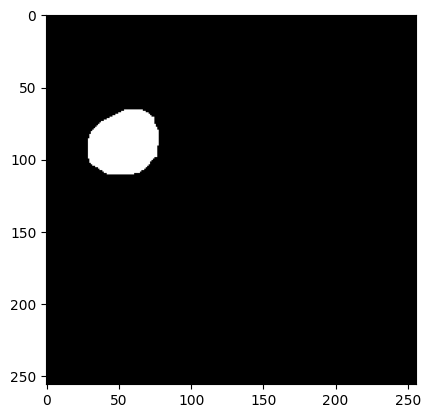

In [ ]:
sn_msk=cv2.imread(f'{sn_msk}')
plt.imshow(sn_msk)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()